In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 01. EDA 및 전처리

In [ ]:
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations
from statsmodels.stats.proportion import proportion_confint

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
attrition = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# 데이터 모양 알아보기
print(attrition.shape)

(1470, 35)


## 1. 데이터 탐색

### 1) 변수 간 관계 **시각화**

##### KDE Plot

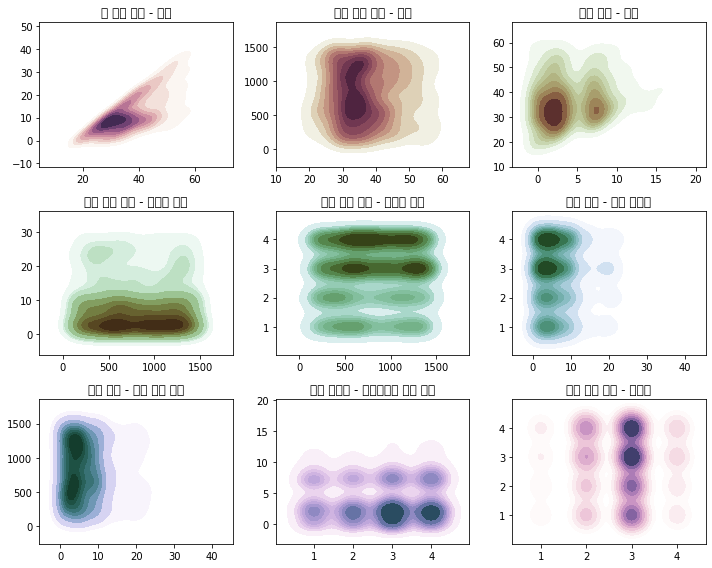

In [ ]:
# 여러 개의 KDE Plot 생성 준비
f, axes = plt.subplots(3, 3, figsize=(10,8), sharex=False, sharey=False)

# Plot 색상 설정
s = np.linspace(0,3,10) 
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(title='총 근로 기간 - 나이')

cmap = sns.cubehelix_palette(start=0.3333333333333, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = '일일 급여 수준 - 나이')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = '직무 기간 - 나이')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = '일일 급여 수준 - 출퇴근 거리')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = '일일 급여 수준 - 직무만 족도')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = '근속 연수 - 직무 만족도')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = '근속 연수 - 일일 급여 수준')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = '관계 만족도 - 관리자와의 협업 기간')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = '일과 삶의 균형 - 만족도')

f.tight_layout()

## 2. 데이터 전처리

### 1) 결측값 처리

In [ ]:
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

### 2) 중복값 처리

In [ ]:
# 중복된 항목 수 알아보기
print("중복된 항목 수 :", len(attrition[attrition.duplicated()]))

중복된 항목 수 : 0


## 3. Target Feature 정의
* 방법1 : pandas의 apply 이용
* 방법2 : y.isin([target에 해당하는 컬럼들]).astype('int') 이용

In [ ]:
# 퇴직 여부(Yes/No)에 따라 각각 1,0 할당
target_map = {'Yes':1, 'No':0}

# pandas apply를 이용해 퇴직 여부를 1,0으로 표시한 새로운 컬럼 생성
attrition['Attrition_numerical']=attrition['Attrition'].apply(lambda x: target_map[x])
attrition['Attrition_numerical'].value_counts()

0    1233
1     237
Name: Attrition_numerical, dtype: int64

In [ ]:
y = attrition['Attrition'].copy()
y = y.isin(['Yes']).astype('int')
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## 4. 데이터 타입별 Feature 변환

### 1) Feature 탐색

##### 총 Feature 개수 확인

In [ ]:
print(attrition.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Feature 데이터 타입별 개수 확인

In [ ]:
# 데이터 타입별 컬럼 수 확인
dtype_data = attrition.dtypes.reset_index()
dtype_data.columns = ['Count', 'Column Type']
dtype_data = dtype_data.groupby('Column Type').aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64     27
1      object      9


### 2) 범주형 Feature
* 데이터 확인
* Feature 별 개수 시각화
* 날짜/숫자/기간 등으로 변환해야 할 항목이 있는지 확인
* Feature 별 개수 시각화
* Feature의 개수가 인코딩에 적합한가?

##### 데이터 확인

In [ ]:
attrition.select_dtypes(include=['object','category']).head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


##### Feature 제거
> Feature 별 유일한 값 개수 확인

In [ ]:
cat_feat = attrition.select_dtypes('object','category').columns.values
attrition_cat = attrition[cat_feat].copy()
print(attrition_cat.nunique().sort_values())

Over18            1
Attrition         2
Gender            2
OverTime          2
BusinessTravel    3
Department        3
MaritalStatus     3
EducationField    6
JobRole           9
dtype: int64


> 유일한 값이 1개인 경우 또는 모든 행의 값이 다른 경우는 제거
* target feature가 포함되어 있으면 함께 제거

In [ ]:
attrition_cat = attrition_cat.drop(['Over18','Attrition'], axis=1, errors='ignore')

##### Feature 별 개수 시각화

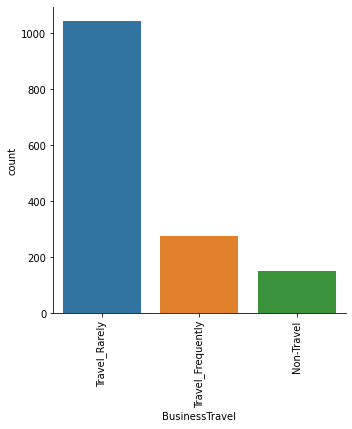

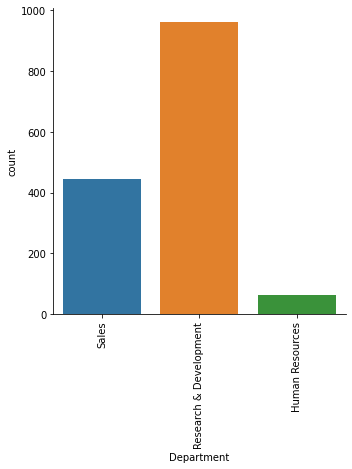

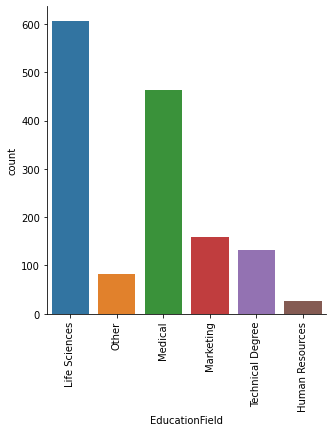

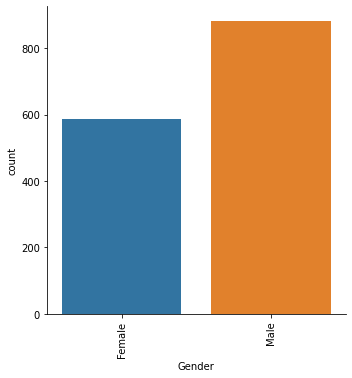

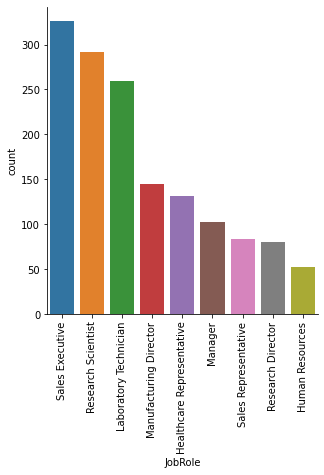

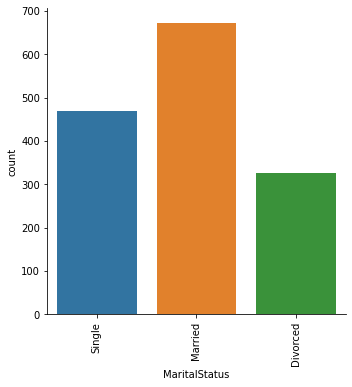

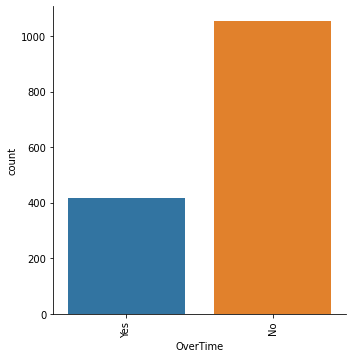

In [ ]:
for col in attrition_cat.columns:
  fig = sns.catplot(x=col, kind='count', data=attrition_cat, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.show()

##### Feature의 개수가 인코딩에 적합한가?
* 인코딩을 했을 경우 메모리 문제가 발생하지 않는가?


> Feature 인코딩
* LabelEncoder : LabelEncoder는 선형성을 가지는 머신러닝 기법에 쓰면 좋지 않다
* OneHotEncoder vs. get_dummies


In [ ]:
attrition_cat_dummies = pd.get_dummies(attrition_cat)
attrition_cat_dummies.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### 3) 숫자형 Feature
* 데이터 확인
* Feature 제거
* Feature Skewness 확인

##### 데이터 확인

In [ ]:
attrition.select_dtypes(include=['number']).head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,1102,1,2,1,1,2,94,3,2,...,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,...,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,...,80,1,6,3,3,2,2,2,2,0


In [ ]:
num_feat = attrition.select_dtypes('number').columns.values
attrition_num = attrition[num_feat].copy()

##### Feature 제거
> Feature 별 유일한 값 개수 확인

In [ ]:
print(attrition_num.nunique().sort_values())

EmployeeCount                  1
StandardHours                  1
Attrition_numerical            2
PerformanceRating              2
WorkLifeBalance                4
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
EmployeeNumber              1470
dtype: int64


In [ ]:
print(attrition.shape)

(1470, 36)


> 유일한 값이 1개인 경우 또는 모든 행의 값이 다른 경우는 제거
* target feature가 포함되어있으면 함께 제거

In [ ]:
attrition_num = attrition_num.drop(['StandardHours','EmployeeCount','EmployeeNumber','Attrition_numerical'],axis=1,errors='ignore')

##### Feature Skewness 확인

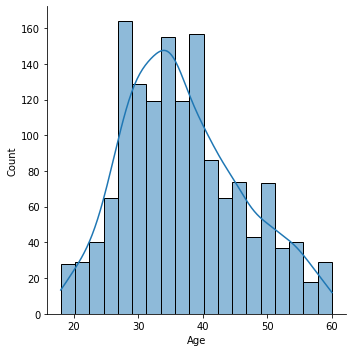

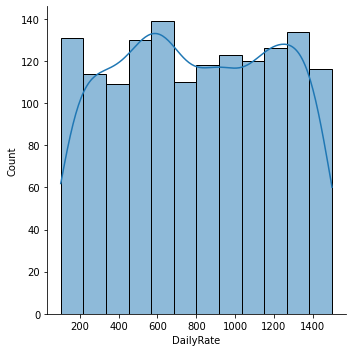

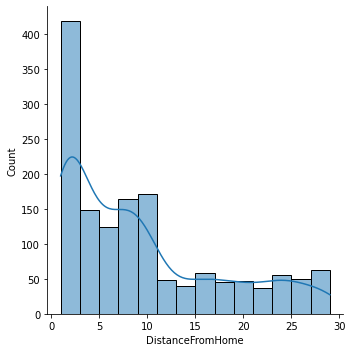

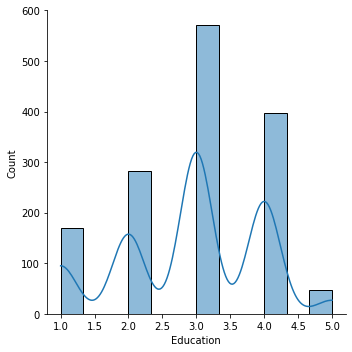

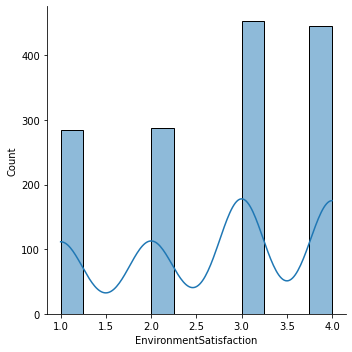

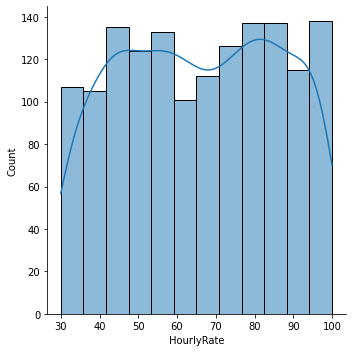

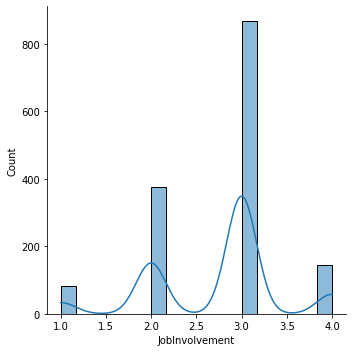

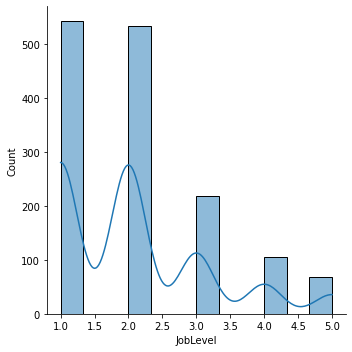

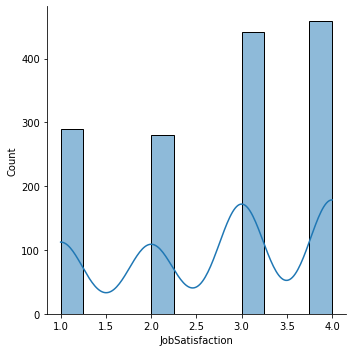

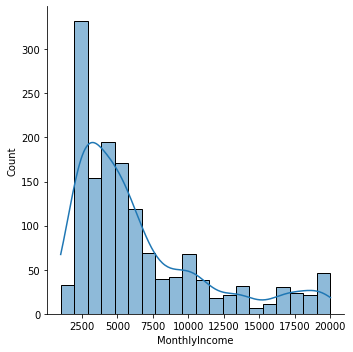

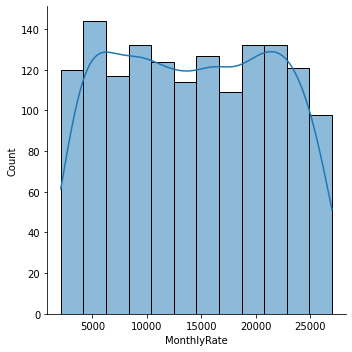

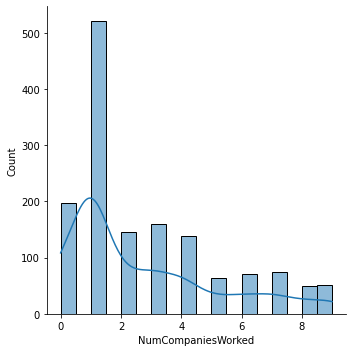

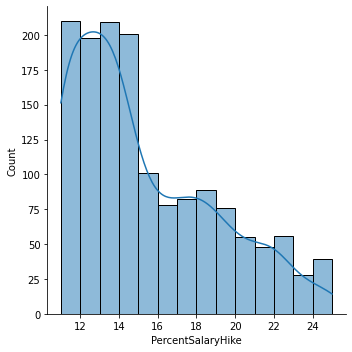

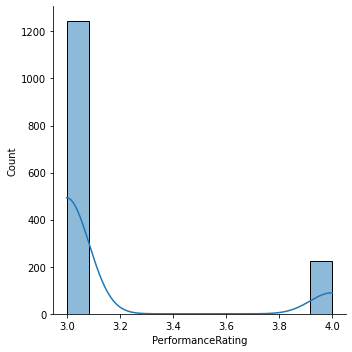

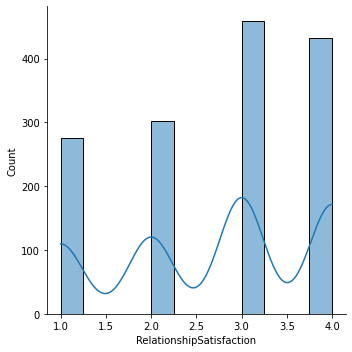

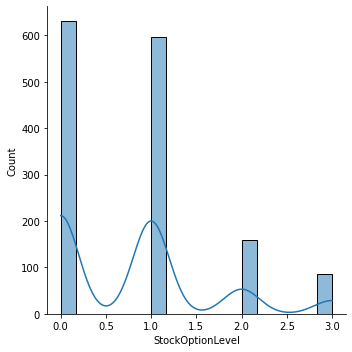

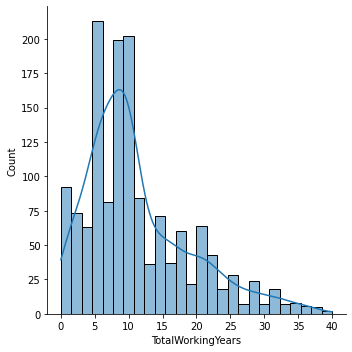

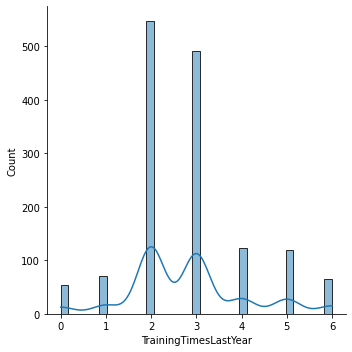

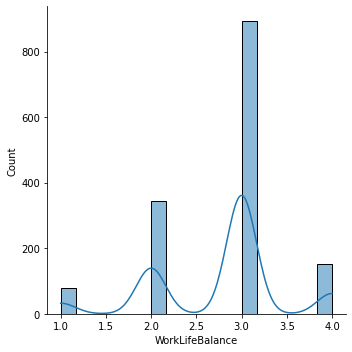

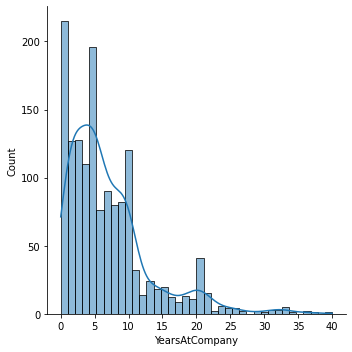

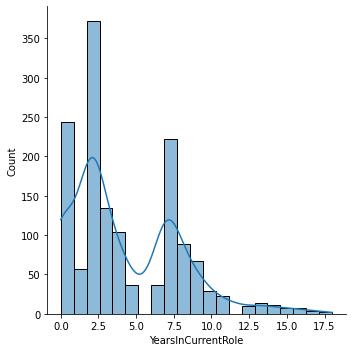

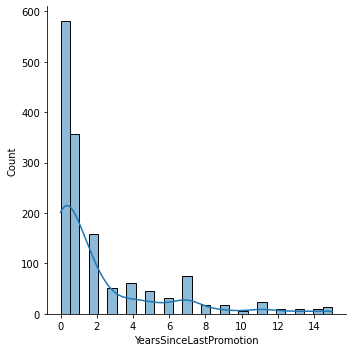

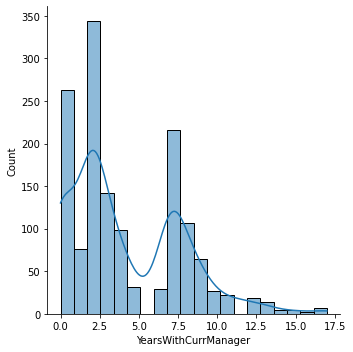

In [ ]:
col_attrition_num = attrition_num.columns.values
for i in range(0,len(col_attrition_num)):
  sns.displot(attrition_num[col_attrition_num[i]],kde=True)

## 5. 상관성에 따른 Feature 정제

### 1) 숫자형 Feature
* 데이터 확인
* 숫자형 컬럼들 간 Pearson R 상관계수 구하기
* 상관 계수가 0.9 이상인 컬럼들 중 가장 큰 컬럼 제거
* 컬럼들 간 조합 생성 : comb_num_feat=np.array(list(combinations(num_feat,2)))
* Pearson R 상관계수 구하기 : pearsonr(x1,x2)[0]

##### 데이터 확인

In [ ]:
attrition_num.nunique().sort_values()

PerformanceRating              2
WorkLifeBalance                4
EnvironmentSatisfaction        4
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
dtype: int64

##### Feature 간 관계 시각화

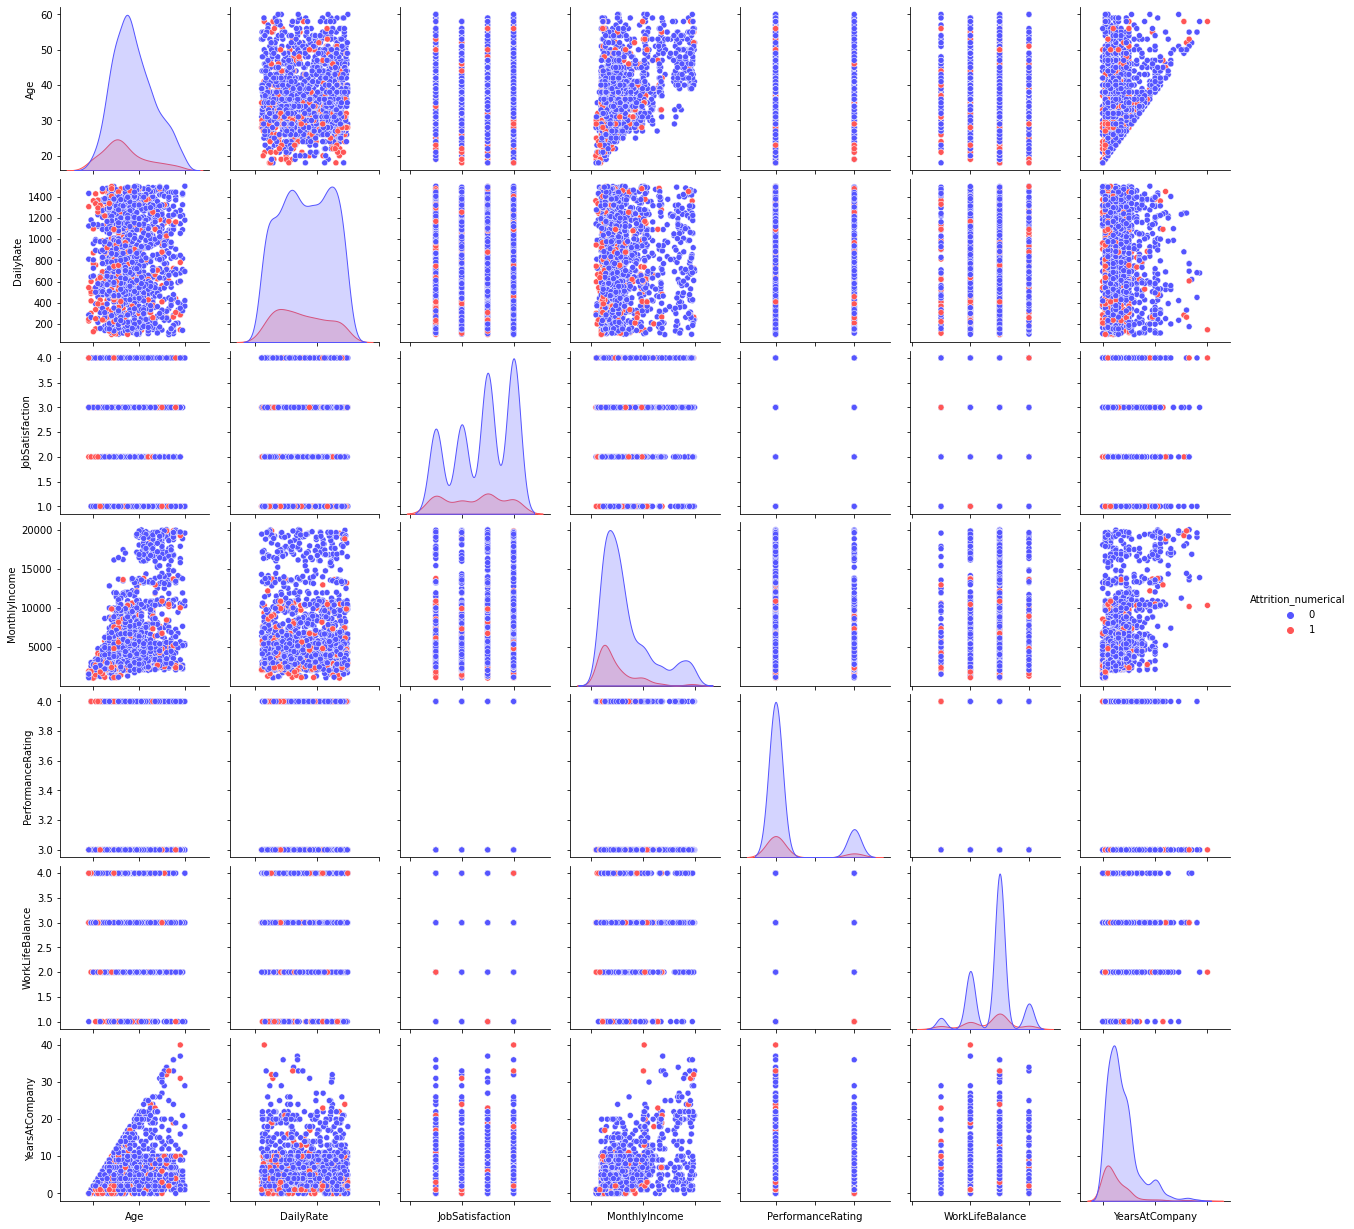

In [ ]:
# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction', u'MonthlyIncome', u'PerformanceRating', u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

g = sns.pairplot(attrition[numerical],hue='Attrition_numerical',palette='seismic',diag_kind='kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

##### 상관계수 구하기

* 방법1

In [ ]:
num_feat = attrition_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat,2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
  corr = pearsonr(attrition_num[comb[0]],attrition_num[comb[1]])[0]
  corr_num_feat = np.append(corr_num_feat, corr)

In [ ]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat)>=0.9]
high_corr_num

array([['JobLevel', 'MonthlyIncome']], dtype='<U24')

* 방법2

In [ ]:
# plotly 안 보이는 문제 해결
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pio.renderers
pio.renderers.default = 'colab'
pio.renderers

data = [
    go.Heatmap(
        z=attrition_num.astype(float).corr().values, #피어슨 상관계수
        x=attrition_num.columns.values,
        y=attrition_num.columns.values,
        colorscale='Viridis',
        reversescale=False,
        opacity=1.0
    )
]

layout = go.Layout(
    title='숫자형 Feature들의 피어슨 상관계수',
    xaxis=dict(ticks='', nticks=36),
    yaxis=dict(ticks=''),
    width=900, height=700,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

##### Feature 제거

In [ ]:
attrition_num = attrition_num.drop(np.unique(high_corr_num[:,0]),axis=1,errors='ignore')
# 0.9 이상인 것 하나 제거해달라

### 2) 범주형 Feature

##### 데이터 확인

In [ ]:
attrition_cat_dummies.nunique().sort_values()

BusinessTravel_Non-Travel            2
MaritalStatus_Single                 2
MaritalStatus_Married                2
MaritalStatus_Divorced               2
JobRole_Sales Representative         2
JobRole_Sales Executive              2
JobRole_Research Scientist           2
JobRole_Research Director            2
JobRole_Manufacturing Director       2
JobRole_Manager                      2
JobRole_Laboratory Technician        2
JobRole_Human Resources              2
JobRole_Healthcare Representative    2
Gender_Male                          2
Gender_Female                        2
EducationField_Technical Degree      2
EducationField_Other                 2
EducationField_Medical               2
EducationField_Marketing             2
EducationField_Life Sciences         2
EducationField_Human Resources       2
Department_Sales                     2
Department_Research & Development    2
Department_Human Resources           2
BusinessTravel_Travel_Rarely         2
BusinessTravel_Travel_Fre

In [ ]:
attrition_cat_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2):
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape)-1
  return (stat/(obs*mini))

In [ ]:
rows = []
for var1 in attrition_cat_dummies:
  col = []
  for var2 in attrition_cat_dummies:
    cramers = cramers_V(attrition_cat_dummies[var1],attrition_cat_dummies[var2]) #Cramer's V test
    col.append(round(cramers,2))
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=attrition_cat_dummies.columns, index=attrition_cat_dummies.columns)

df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
BusinessTravel_Non-Travel,0.99,0.03,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Frequently,0.03,1.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Rarely,0.27,0.56,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Department_Human Resources,0.00,0.00,0.00,0.98,0.08,0.02,0.40,0.00,0.00,0.00,...,0.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0.0
Department_Research & Development,0.00,0.00,0.00,0.08,1.00,0.82,0.03,0.02,0.23,0.03,...,0.06,0.03,0.13,0.54,0.11,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.sum(df>0.9)

BusinessTravel_Non-Travel            1
BusinessTravel_Travel_Frequently     1
BusinessTravel_Travel_Rarely         1
Department_Human Resources           1
Department_Research & Development    1
Department_Sales                     1
EducationField_Human Resources       1
EducationField_Life Sciences         1
EducationField_Marketing             1
EducationField_Medical               1
EducationField_Other                 1
EducationField_Technical Degree      1
Gender_Female                        2
Gender_Male                          2
JobRole_Healthcare Representative    1
JobRole_Human Resources              1
JobRole_Laboratory Technician        1
JobRole_Manager                      1
JobRole_Manufacturing Director       1
JobRole_Research Director            1
JobRole_Research Scientist           1
JobRole_Sales Executive              1
JobRole_Sales Representative         1
MaritalStatus_Divorced               1
MaritalStatus_Married                1
MaritalStatus_Single     

In [ ]:
attrition_final = pd.concat([attrition_num, attrition_cat_dummies],axis=1)


In [ ]:
attrition_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,5130,24907,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,3,2090,2396,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,3,2909,23159,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,2,3468,16632,...,0,0,0,0,0,0,1,0,1,0


## 6. Target Feature 불균형 문제 처리

### 1) 불균형 데이터 확인

In [ ]:
data = [go.Bar(
    x=attrition['Attrition'].value_counts().index.values,
    y=attrition['Attrition'].value_counts().values
)]
py.iplot(data, filename='basic-bar')

### 2) SMOTE를 이용한 오버샘플링 적용

In [ ]:
target = attrition['Attrition_numerical']

In [ ]:
from sklearn.model_selection import train_test_split

train, test, target_train, target_val = train_test_split(attrition_final, target, train_size=0.80, random_state=0);

In [ ]:
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train,target_train)

# 03. 머신러닝 모델링

### 1) 분석 목표는 '직원 이탈의 주요한 원인(Feature)'

### 2) RandomForest 분류 모델
* GridSearchCV : 사용자가 직접 모델의 하이퍼 파라미터의 값을 리스트로 입력하면 값에 대한 경우의 수마다 예측 성능을 측정 평가하여 비교하면서 최적의 하이퍼 파라미터 값을 찾는 과정 진행

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_params = {'n_estimators':[10,100],
             'max_depth':[4,8,10,12],
             'min_samples_leaf':[2,4,8,12],
             'max_features':[0.1,0.3,0.5]
             }

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=rf_params, cv=3, n_jobs=-1)
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'max_features': 0.1, 'min_samples_leaf': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9135


In [ ]:
seed = 0
# 랜덤 포레스트 파라미터
rf_params = {
    'n_jobs':-1,
    'n_estimators':100,
    'max_features':0.1,
    'max_depth':12,
    #'min_sample_leaf':2,
    'random_state':seed,
    'verbose':0
}

In [ ]:
rf = RandomForestClassifier(**rf_params)

In [ ]:
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*60)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8673469387755102
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.71      0.35      0.47        49

    accuracy                           0.87       294
   macro avg       0.79      0.66      0.70       294
weighted avg       0.85      0.87      0.85       294



### 3) Gradient Boosting 분류 모델

In [ ]:
from sklearn.model_selection import GridSearchCV

gb_params = { 'n_estimators' : [1000, 1500],
           'max_depth' : [4, 6],
           'min_samples_leaf' : [2, 4],
           'max_features' : [0.7, 0.9],
           'learning_rate' : [0.25,0.3]
            }

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
gb_clf = GradientBoostingClassifier(random_state = 0)
grid_cv = GridSearchCV(gb_clf, param_grid = gb_params, cv = 3, n_jobs = -1)
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.3, 'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 4, 'n_estimators': 1000}
최고 예측 정확도: 0.9064


In [ ]:
seed = 0
gb_params = {
    'n_estimators':1000,
    #'min_sample_leaf':4,
    'max_features':0.9,
    'max_depth':6,
    'learning_rate':0.3,
    'random_state':seed,
    'verbose':0
}

In [ ]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_prediction = gb.predict(test)

##### 모델 성능

In [ ]:
print("Accuracy score: {}".format(accuracy_score(target_val, gb_prediction)))
print(classification_report(target_val, gb_prediction))

Accuracy score: 0.8639455782312925
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.68      0.35      0.46        49

    accuracy                           0.86       294
   macro avg       0.78      0.66      0.69       294
weighted avg       0.85      0.86      0.85       294



# 04. Feature Importances

### 1) Random Forest 모델

In [ ]:

trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

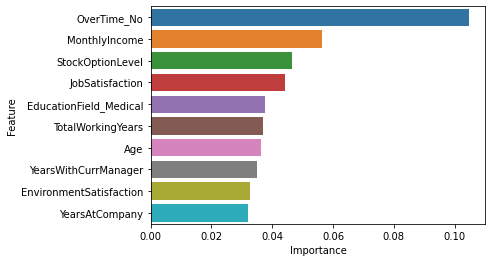

In [ ]:
feat = attrition_final.columns.values
imp = rf.feature_importances_
df = pd.DataFrame({'Feature':feat, 'Importance':imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance',y='Feature',data=df);

### 2) Gradient Boosting 모델

In [ ]:
trace = go.Scatter(
    y = gb.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

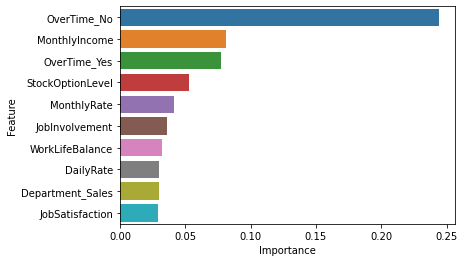

In [ ]:
feat = attrition_final.columns.values
imp = gb.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);